In [1]:
import random
import numpy as np
from argoverse.visualization.visualize_sequences import viz_sequence
from argoverse.map_representation.map_api import ArgoverseMap
import pickle as pkl

In [2]:
with open("nn16.pkl", 'rb') as file:
    data = pkl.load(file)

In [3]:
def prediction(trajectory,num_points=30,avg_points=1):
    #a simple prediction function that predict straight line with constant velocity
    velocity_x_mps = []
    velocity_y_mps = []
    for i in range(1,avg_points+1,1):
        velocity_x_mps.append(trajectory[-i,0] - trajectory[-(1+i),0])
        velocity_y_mps.append(trajectory[-i,1] - trajectory[-(1+i),1])
        
    velocity_x_mps = np.mean(velocity_x_mps)
    velocity_y_mps = np.mean(velocity_y_mps)
    
    current_traj = trajectory[-1]
    results = np.zeros((len(trajectory)+num_points,2))
    
    results[0:len(trajectory)] = trajectory
    
    for i in range(num_points):
        results[len(trajectory)+i] = np.array([current_traj[0]+velocity_x_mps,current_traj[1]+velocity_y_mps])
        current_traj = results[len(trajectory)+i]
    return results

In [4]:
def get_multiple_forecasts(afl):
    predict_traj = []
    for i in range(9,3,-1):
        predict_traj.append(prediction(afl.agent_traj[:20],avg_points=(i)))
    return np.array(predict_traj)

In [5]:
files = ["../../data/train/data/70479.csv", "../../data/train/data/158617.csv", "../../data/train/data/32508.csv", "../../data/train/data/15954.csv", "../../data/train/data/136195.csv", "../../data/train/data/66460.csv", "../../data/train/data/13007.csv", "../../data/train/data/168645.csv", "../../data/train/data/169992.csv", "../../data/train/data/78276.csv", "../../data/train/data/73018.csv", "../../data/train/data/92818.csv", "../../data/train/data/67152.csv", "../../data/train/data/91758.csv../../data/train/data/89661.csv", "../../data/train/data/8573.csv", "../../data/train/data/6643.csv", "../../data/train/data/127788.csv", "../../data/train/data/32487.csv"]
nums = [70479, 158617, 32508, 15954, 136195, 66460, 13007, 168645, 169992, 78276, 73018, 92818, 67152, 91758, 89661, 8573, 6643, 127788, 32487]

In [6]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

##set root_dir to the correct path to your dataset folder
root_dir = '../../data/test_obs/data'
# root_dir = '../../data/train/data'

afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))

Total number of sequences: 78143


In [9]:
# avm = ArgoverseMap()

# obs_len = 20
# shuffled_nums = nums.copy()
# random.shuffle(shuffled_nums)
# for num in shuffled_nums:
#     seq_path = f"{root_dir}/{num}.csv"
#     print(seq_path)
#     viz_sequence(afl.get(seq_path).seq_df, show=True)
#     agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
#     agent_obs_traj_full = afl.get(seq_path).agent_traj
#     xy_pred = get_multiple_forecasts(afl.get(seq_path))
#     candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl.get(seq_path).city, viz=True, 
#                                                                   xy_pred=xy_pred, xy_total=agent_obs_traj_full)
    

../../data/test_obs/data/69950.csv


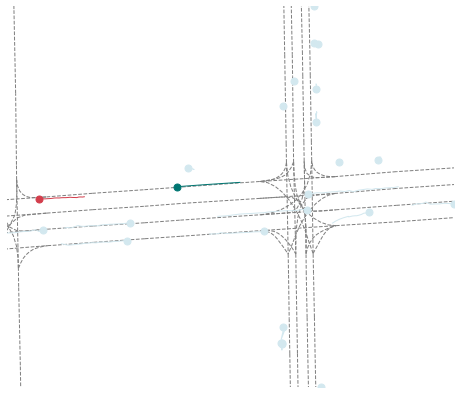

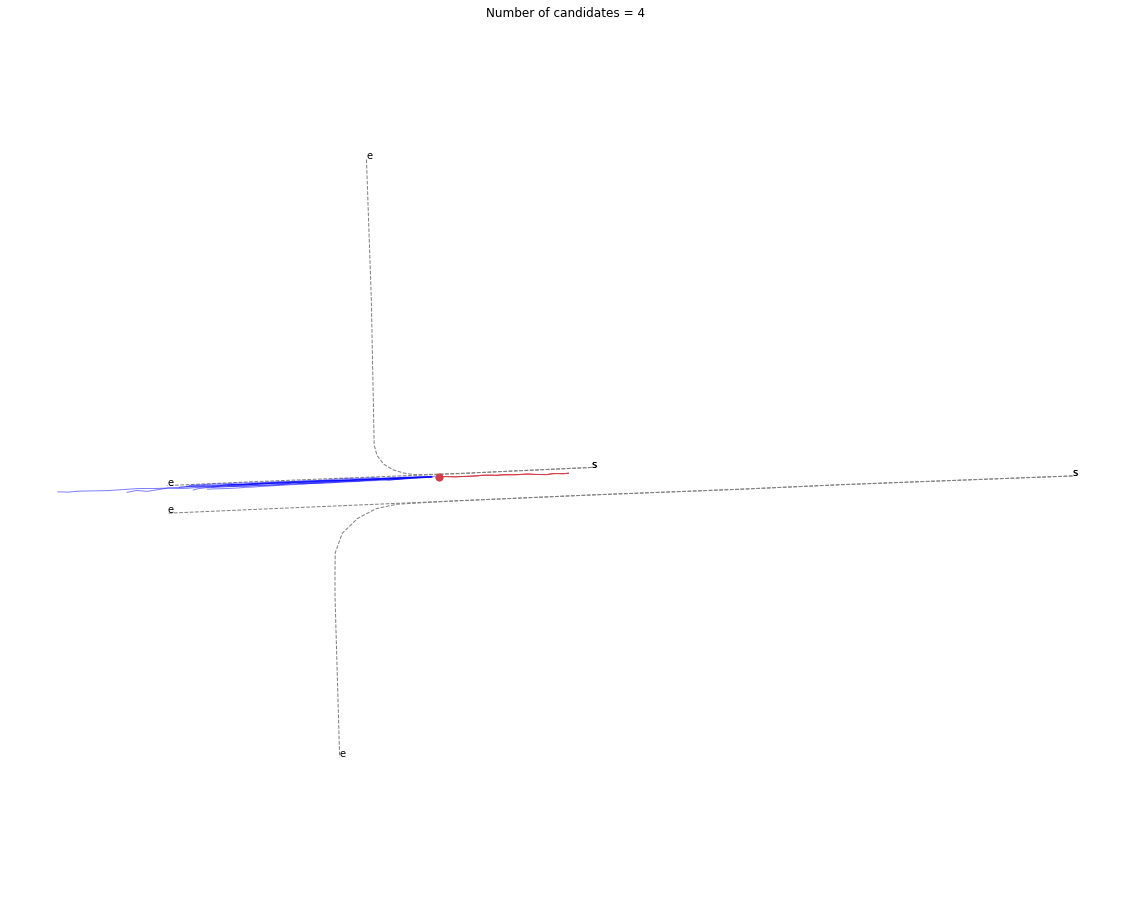

../../data/test_obs/data/13438.csv


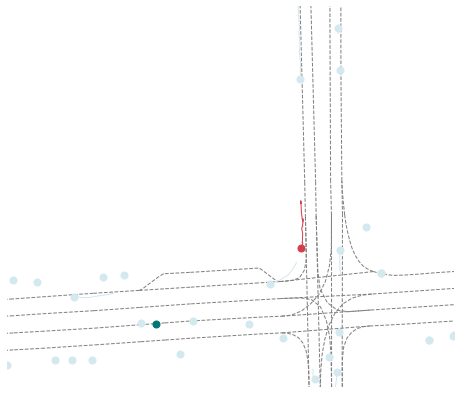

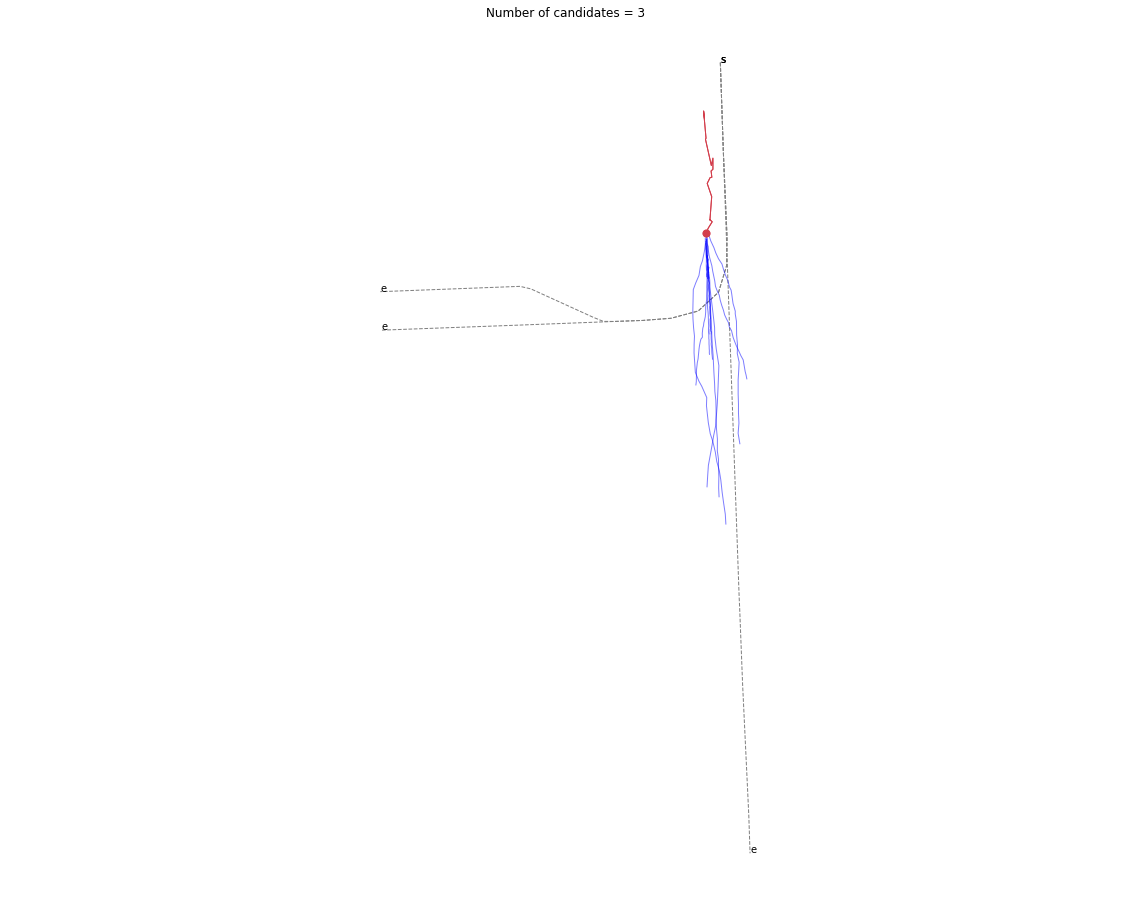

../../data/test_obs/data/4365.csv


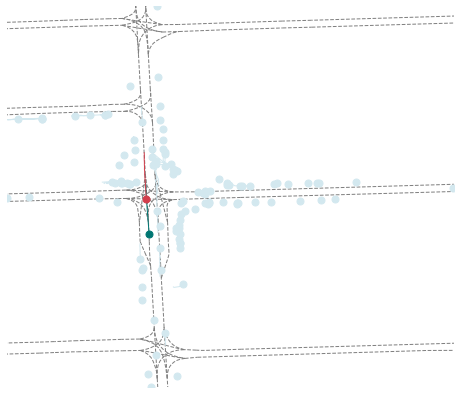

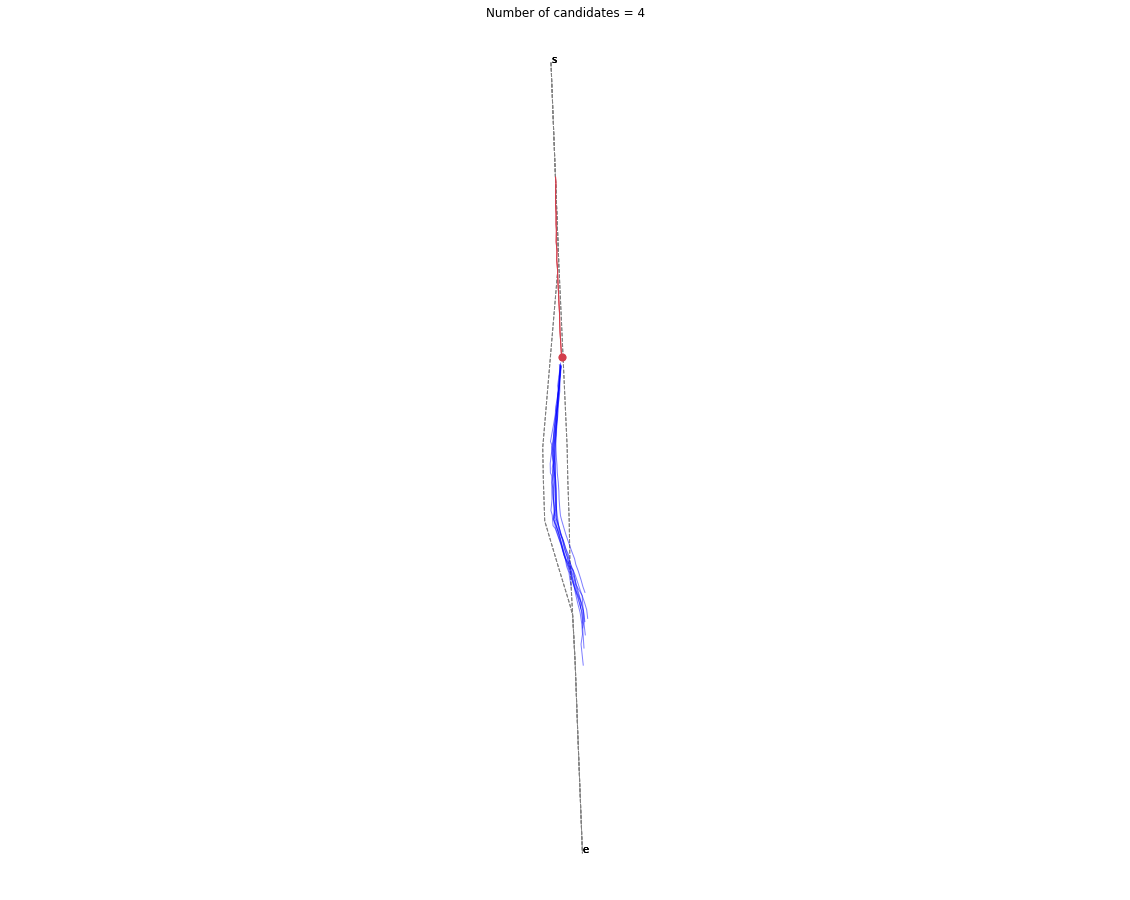

../../data/test_obs/data/19251.csv


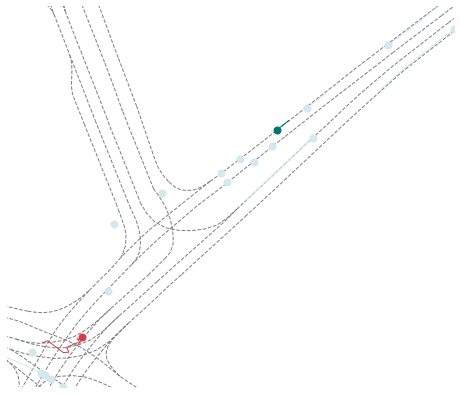

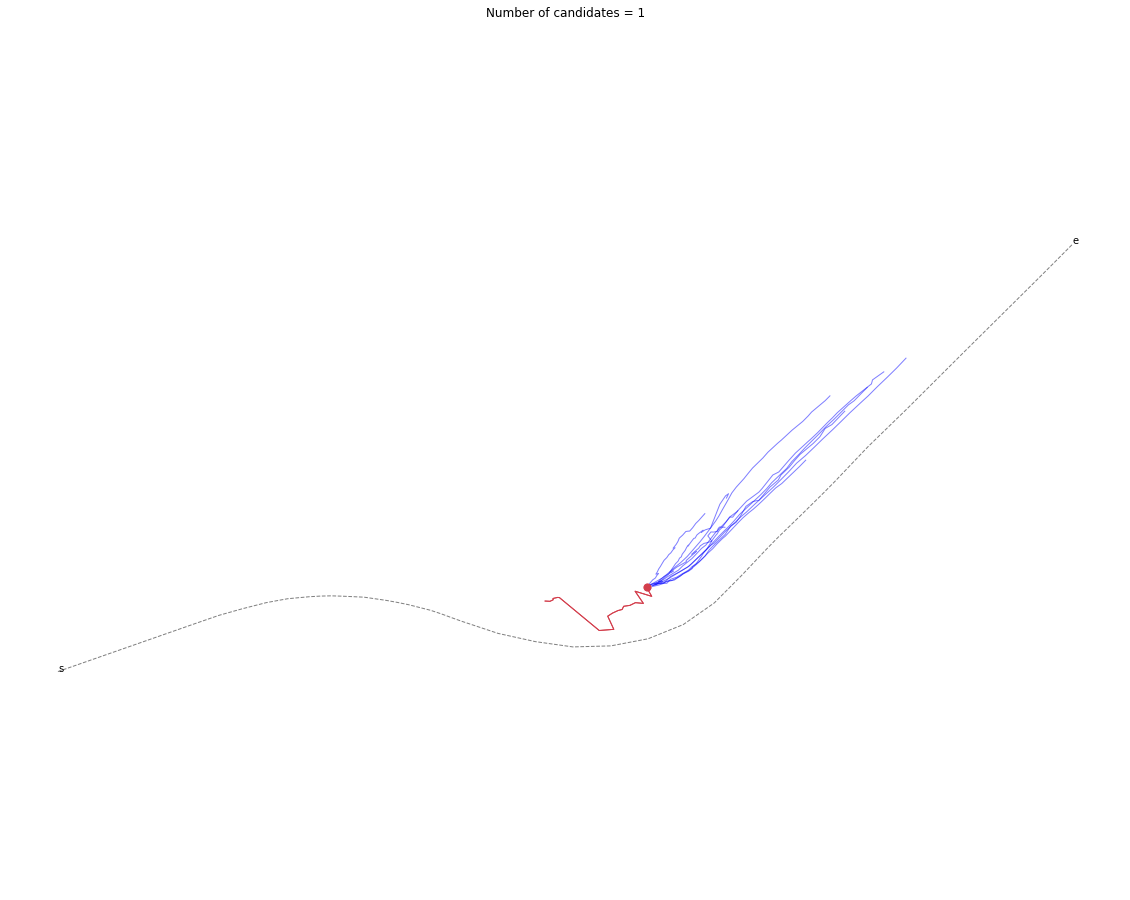

../../data/test_obs/data/70622.csv


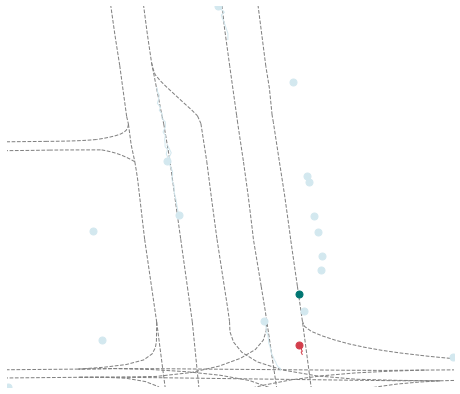

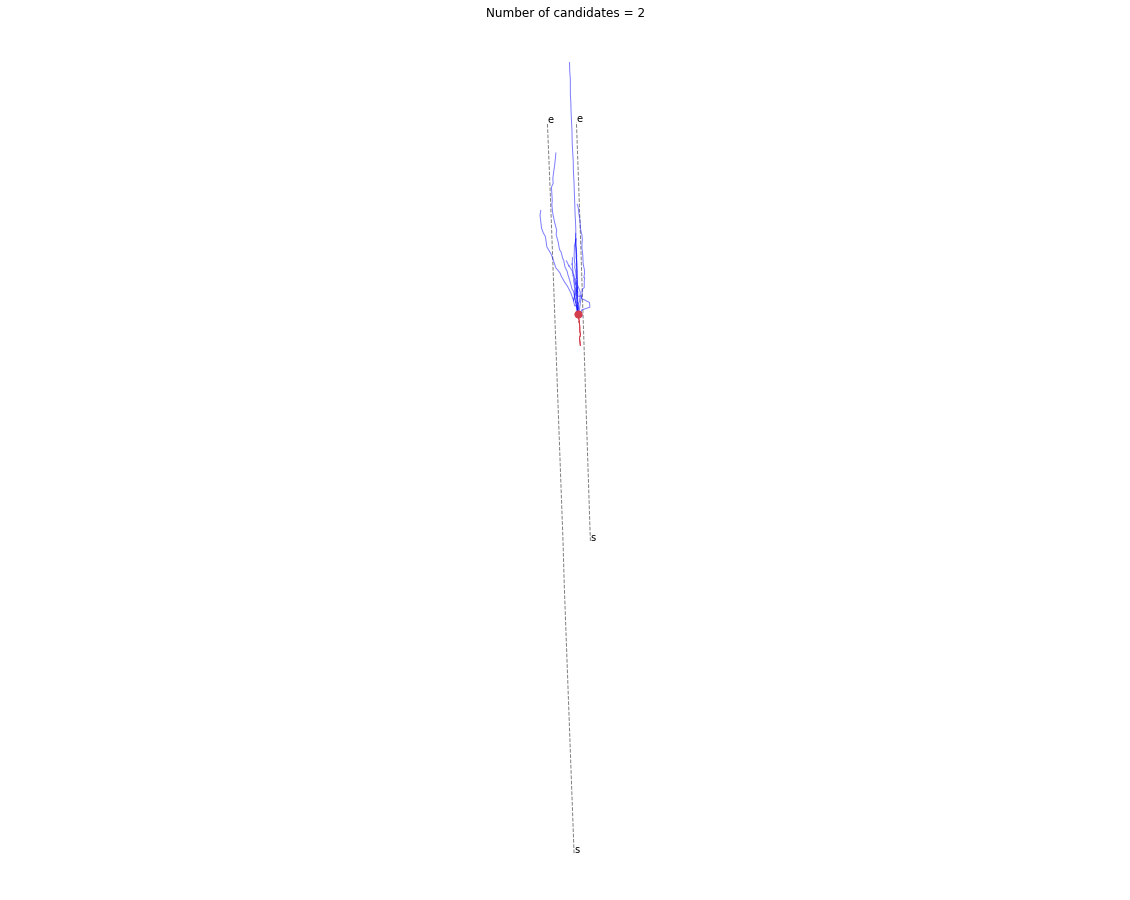

../../data/test_obs/data/30018.csv


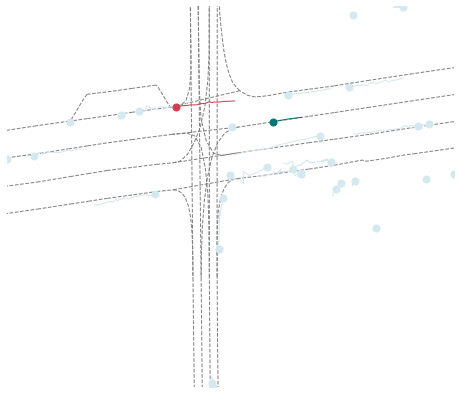

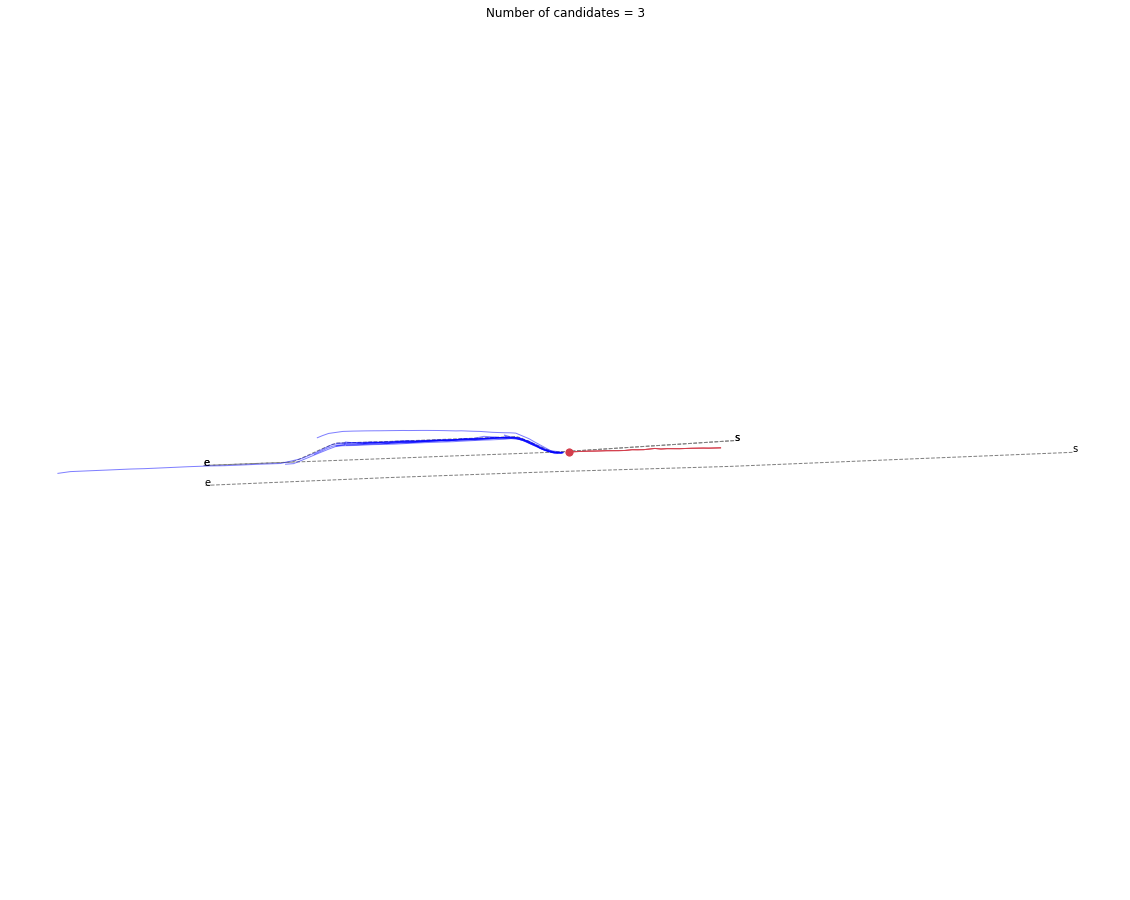

../../data/test_obs/data/66030.csv


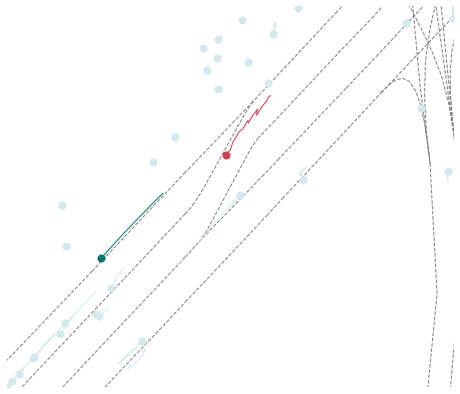

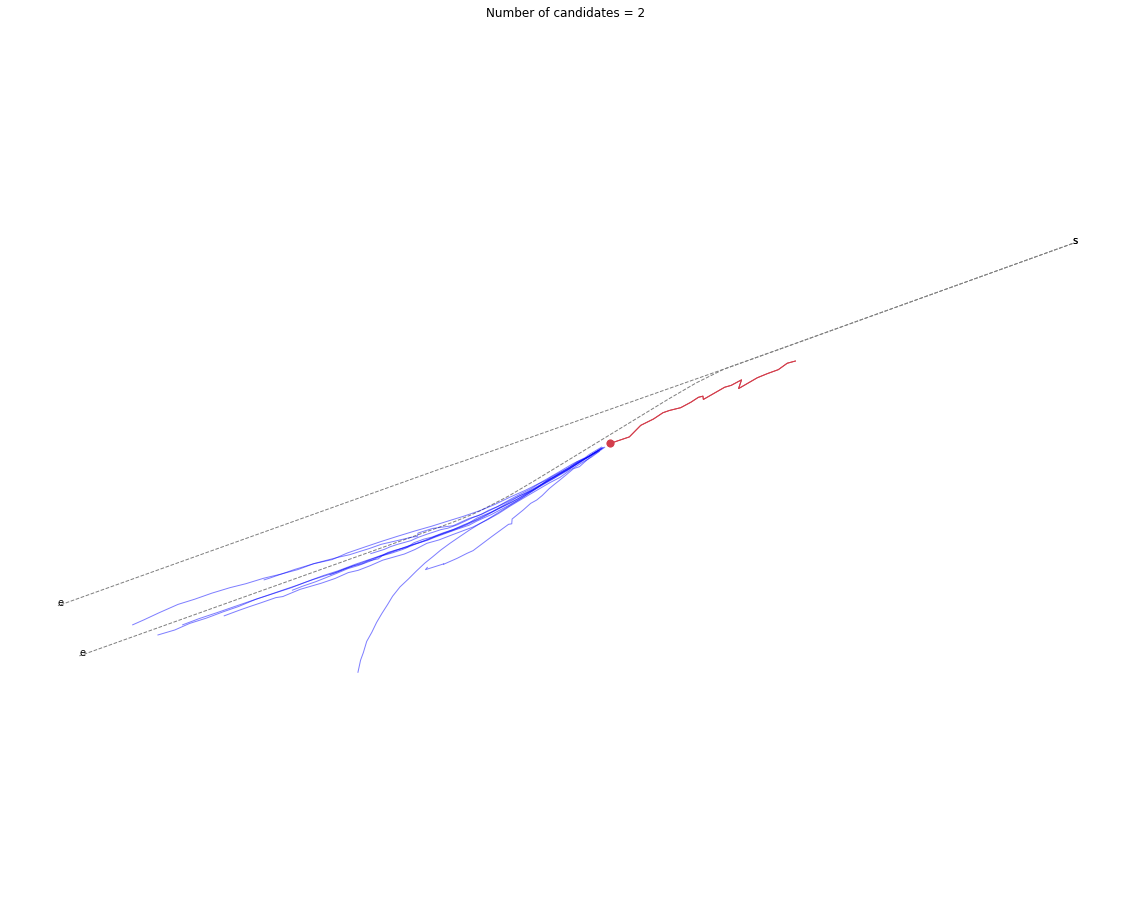

../../data/test_obs/data/53631.csv


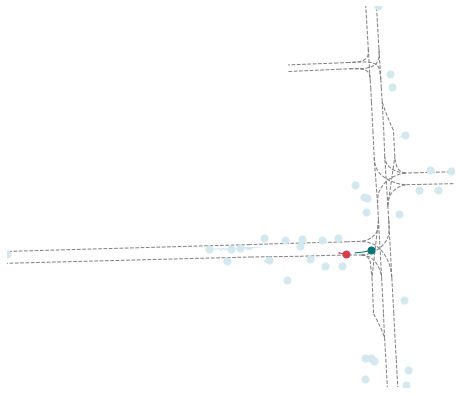

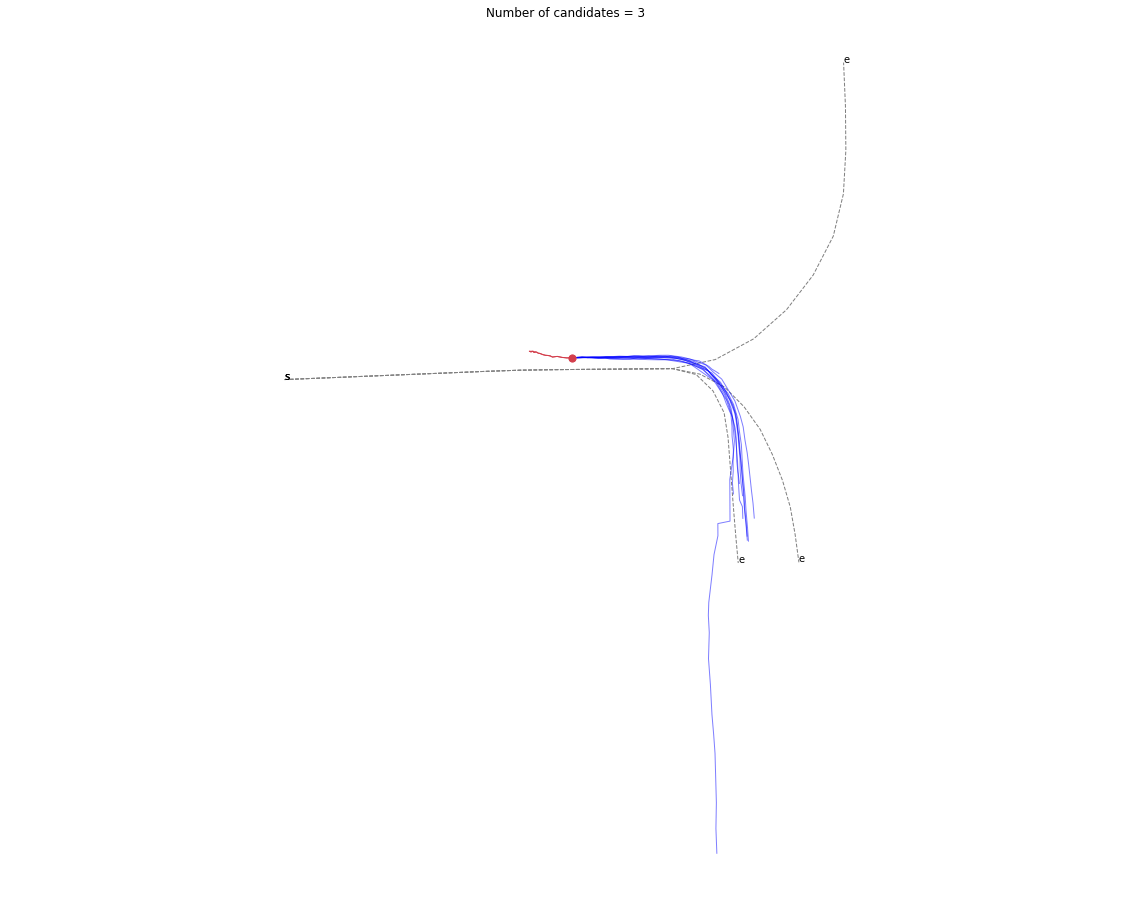

../../data/test_obs/data/16178.csv


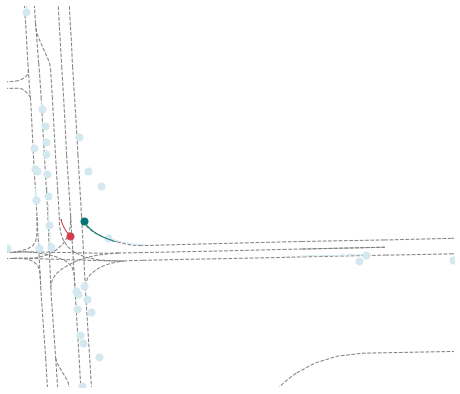

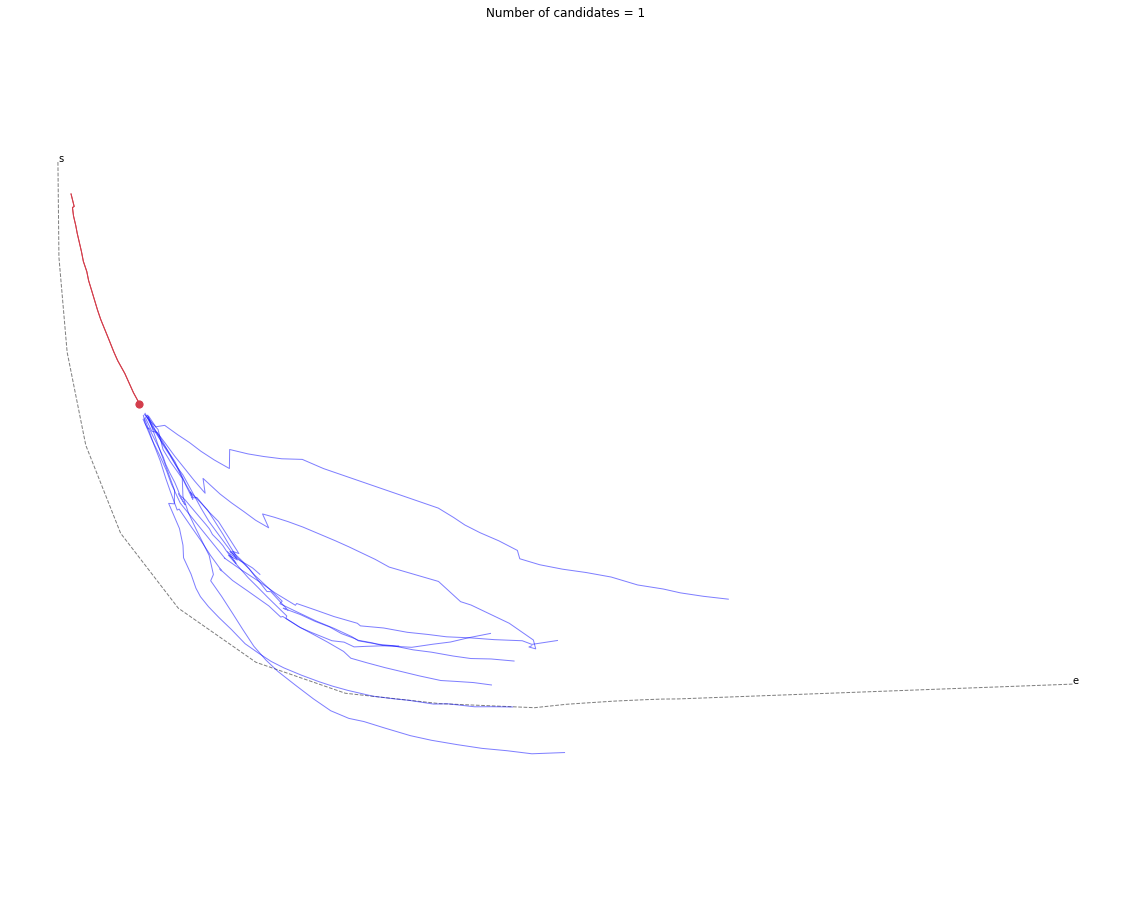

../../data/test_obs/data/71791.csv


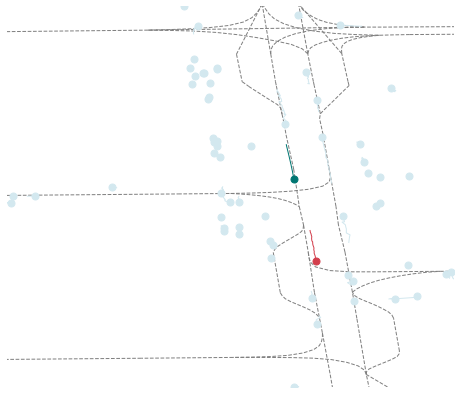

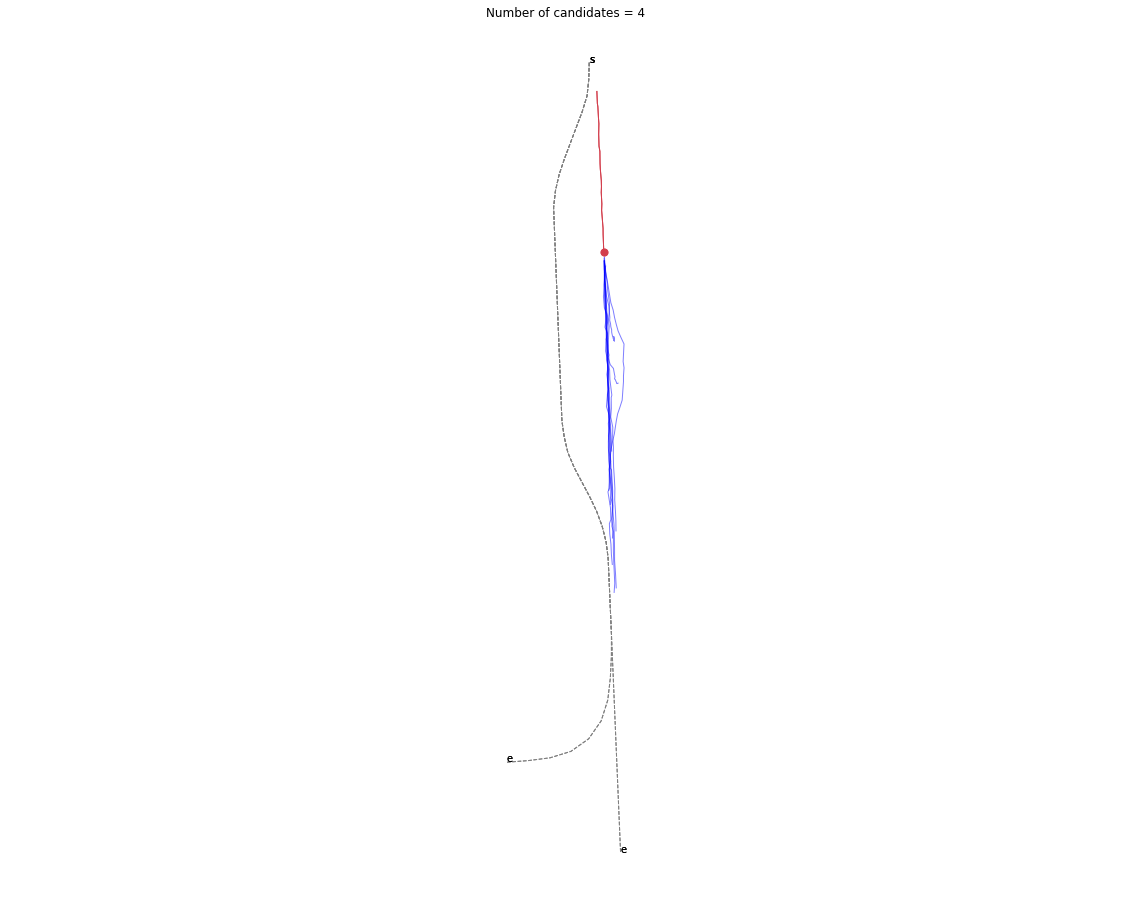

../../data/test_obs/data/38026.csv


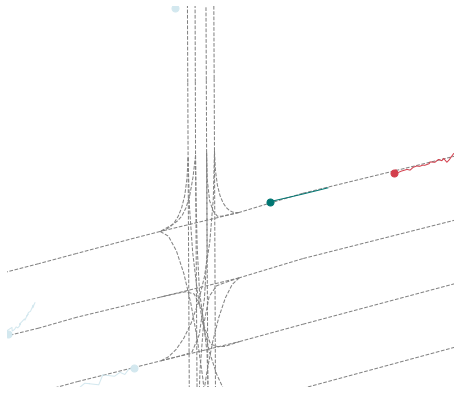

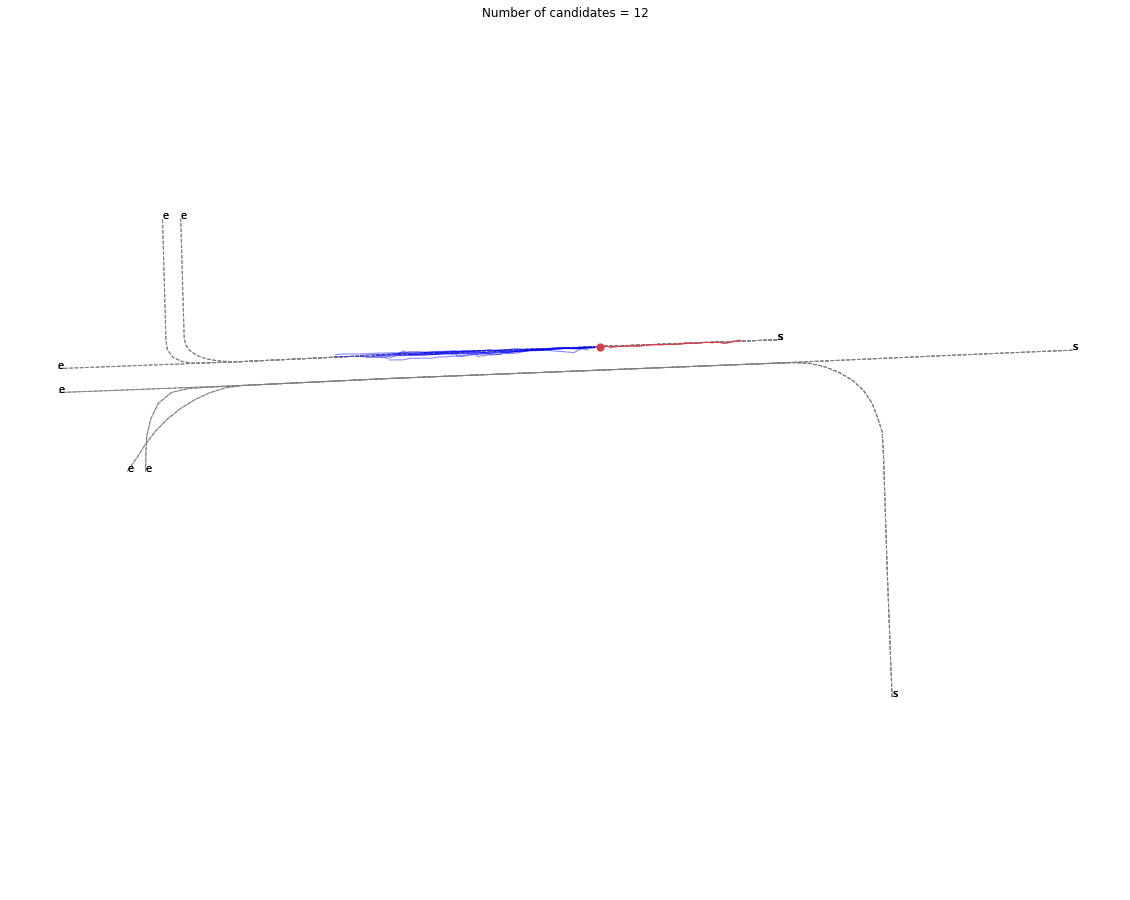

../../data/test_obs/data/56698.csv


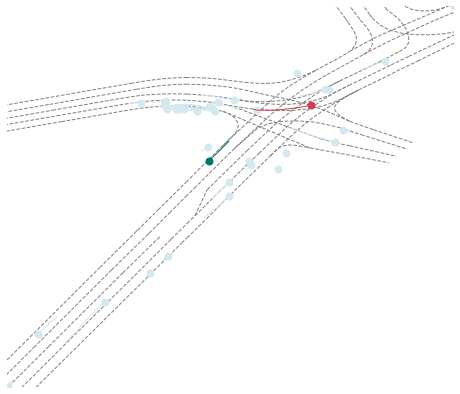

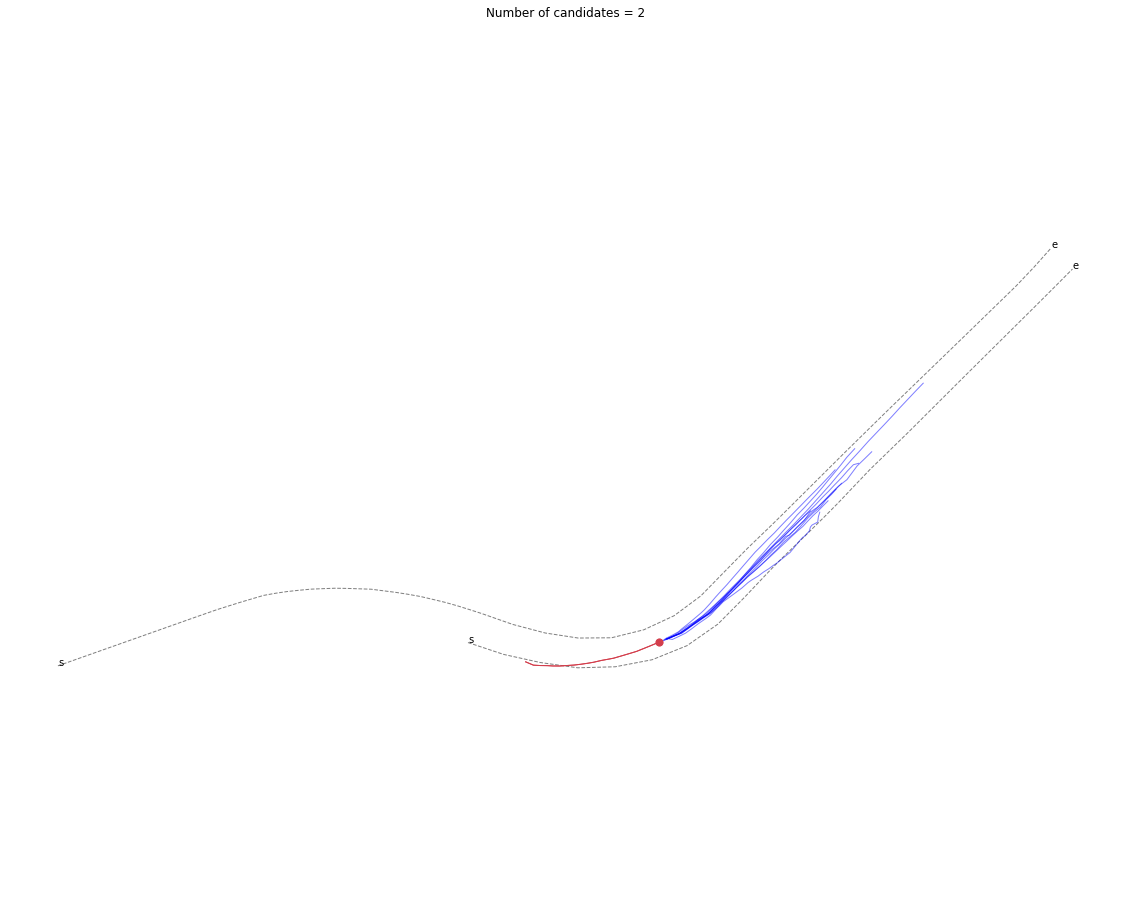

../../data/test_obs/data/26515.csv


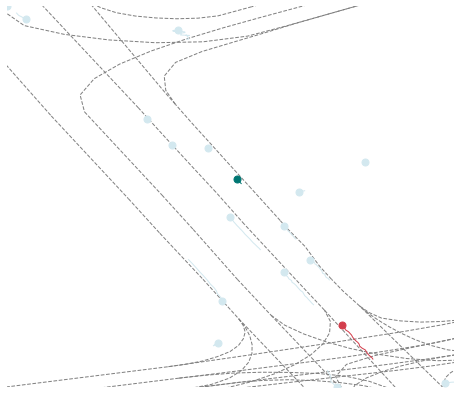

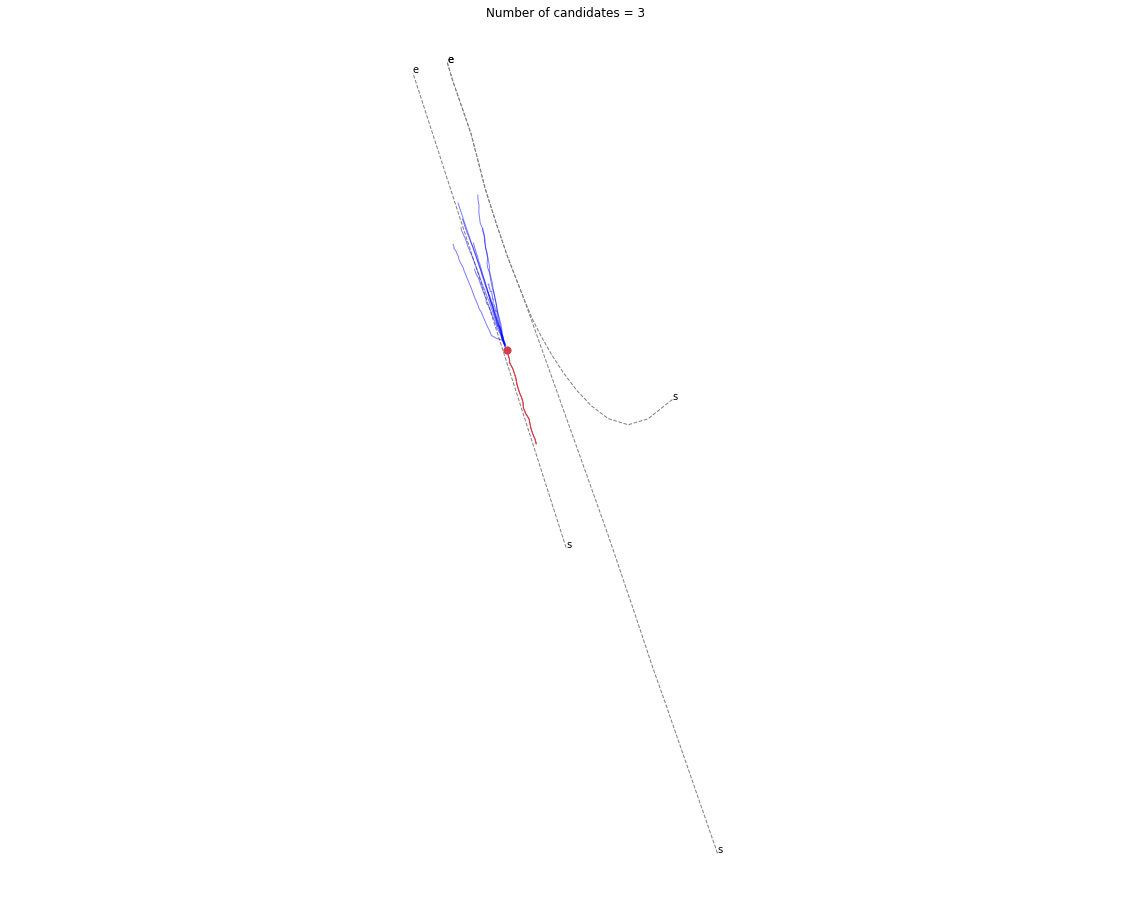

../../data/test_obs/data/6411.csv


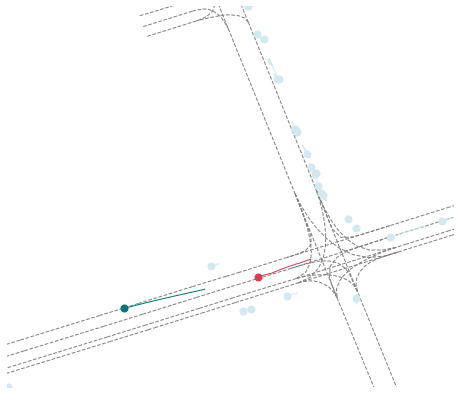

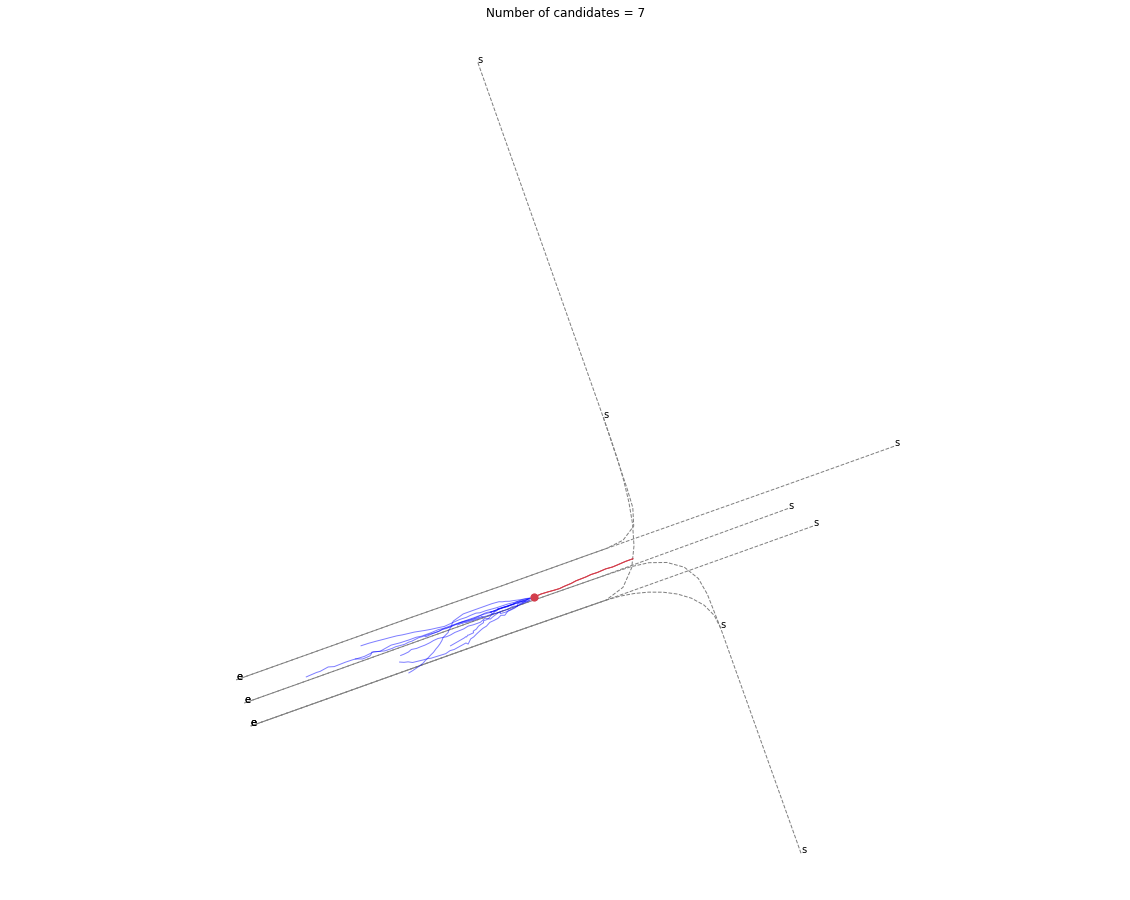

../../data/test_obs/data/21391.csv


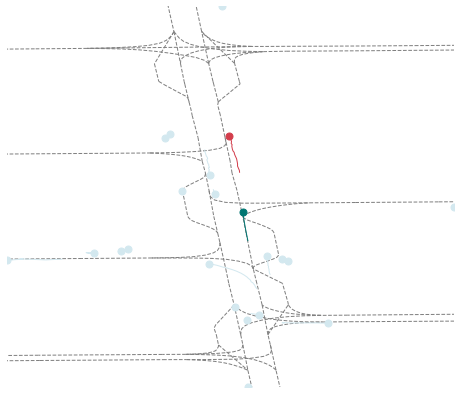

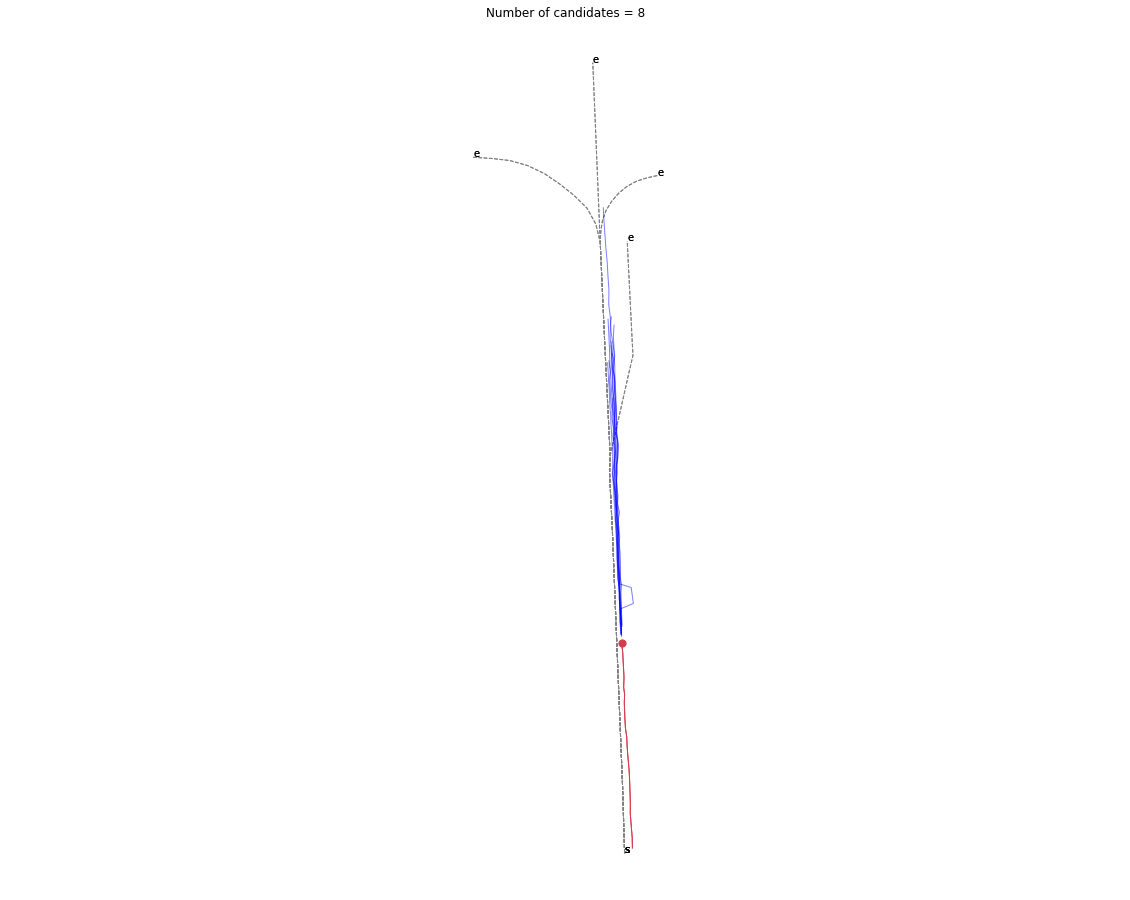

../../data/test_obs/data/30423.csv


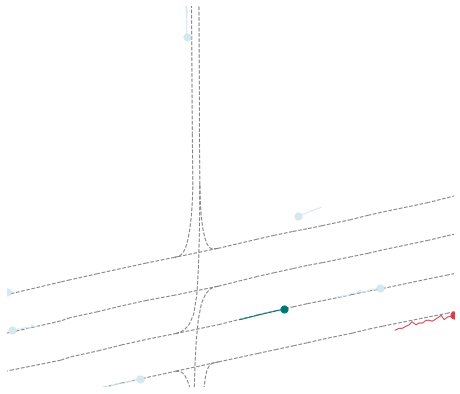

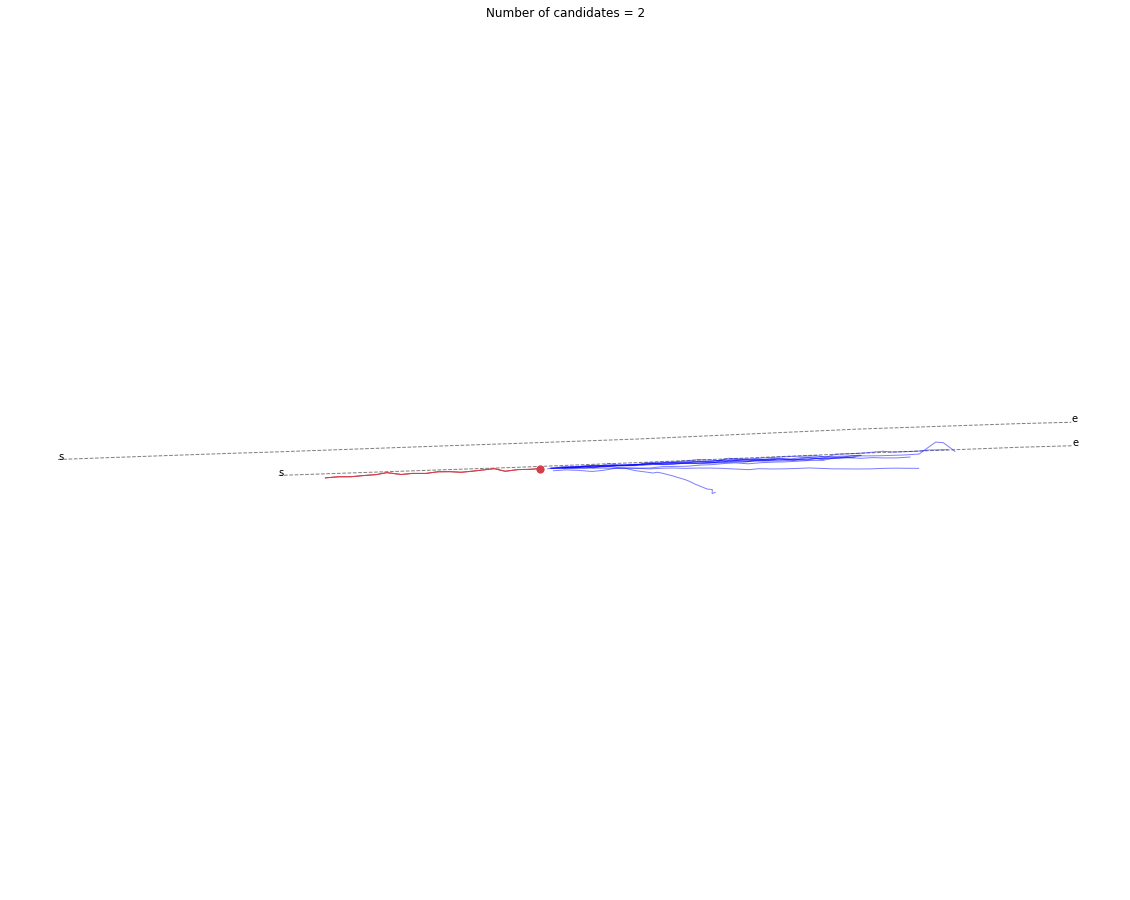

../../data/test_obs/data/68891.csv


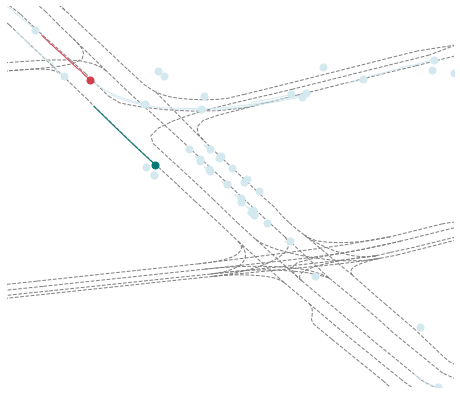

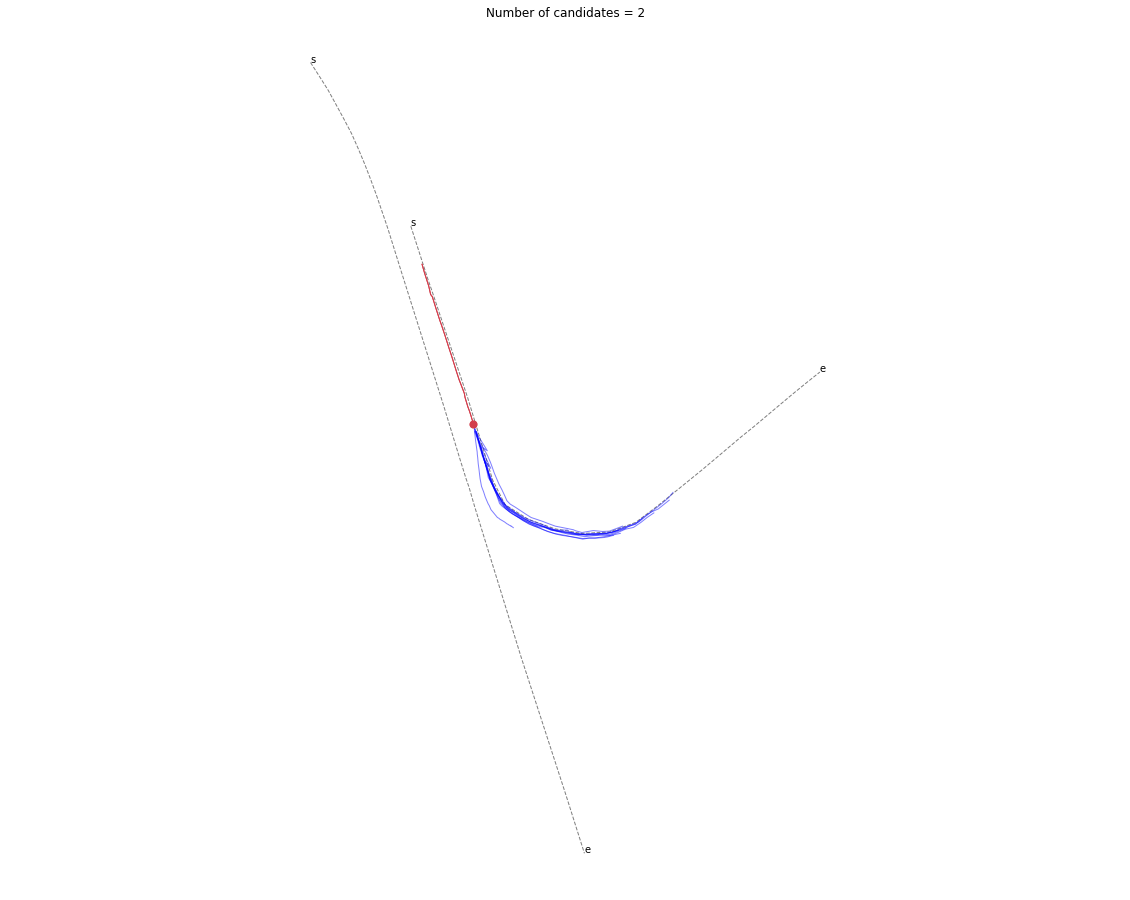

../../data/test_obs/data/21066.csv


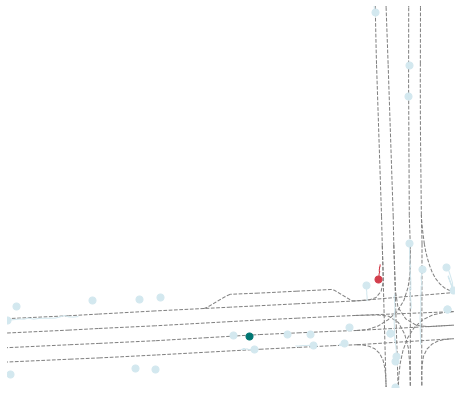

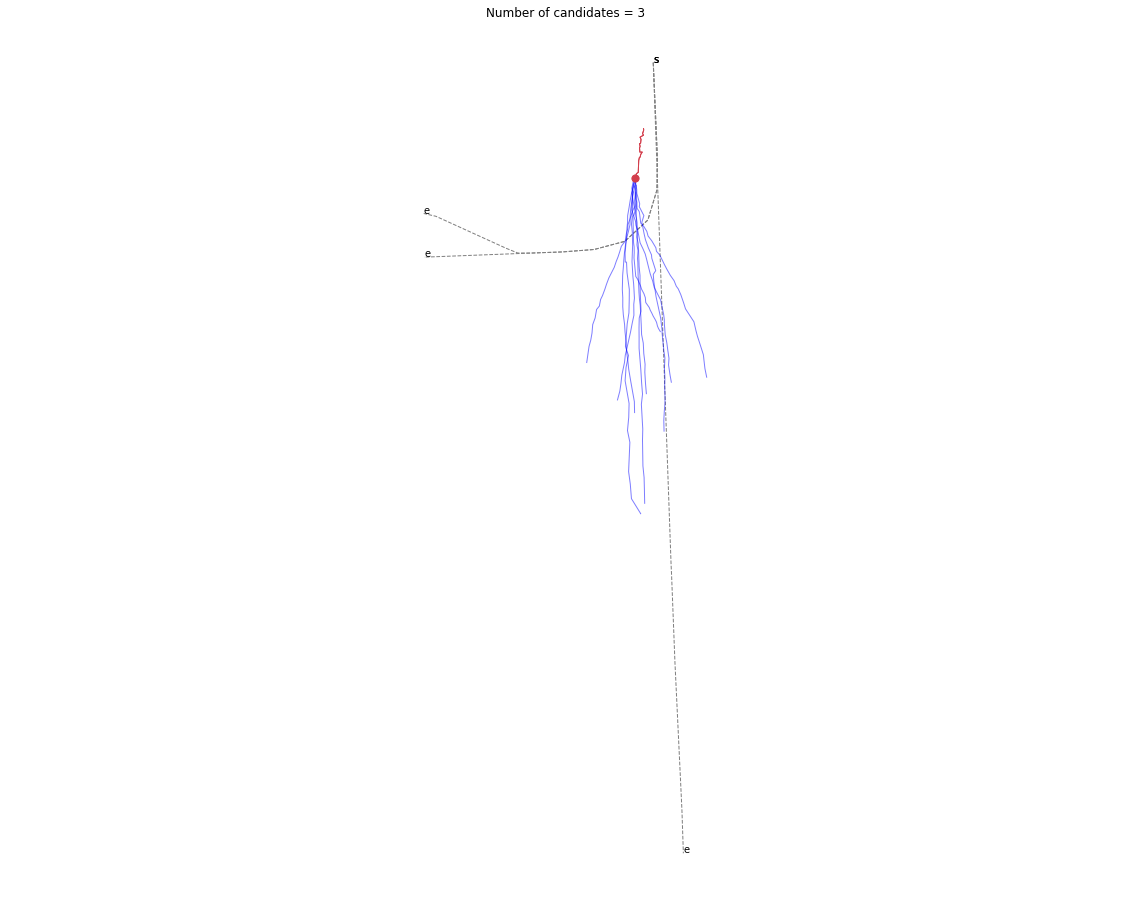

../../data/test_obs/data/32728.csv


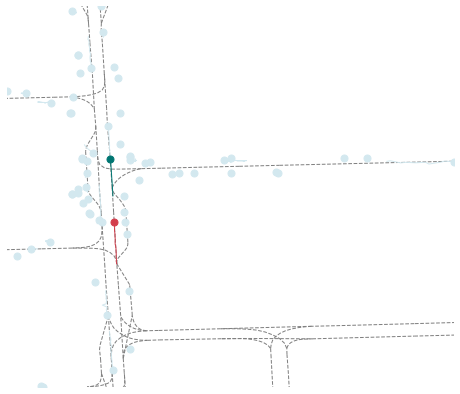

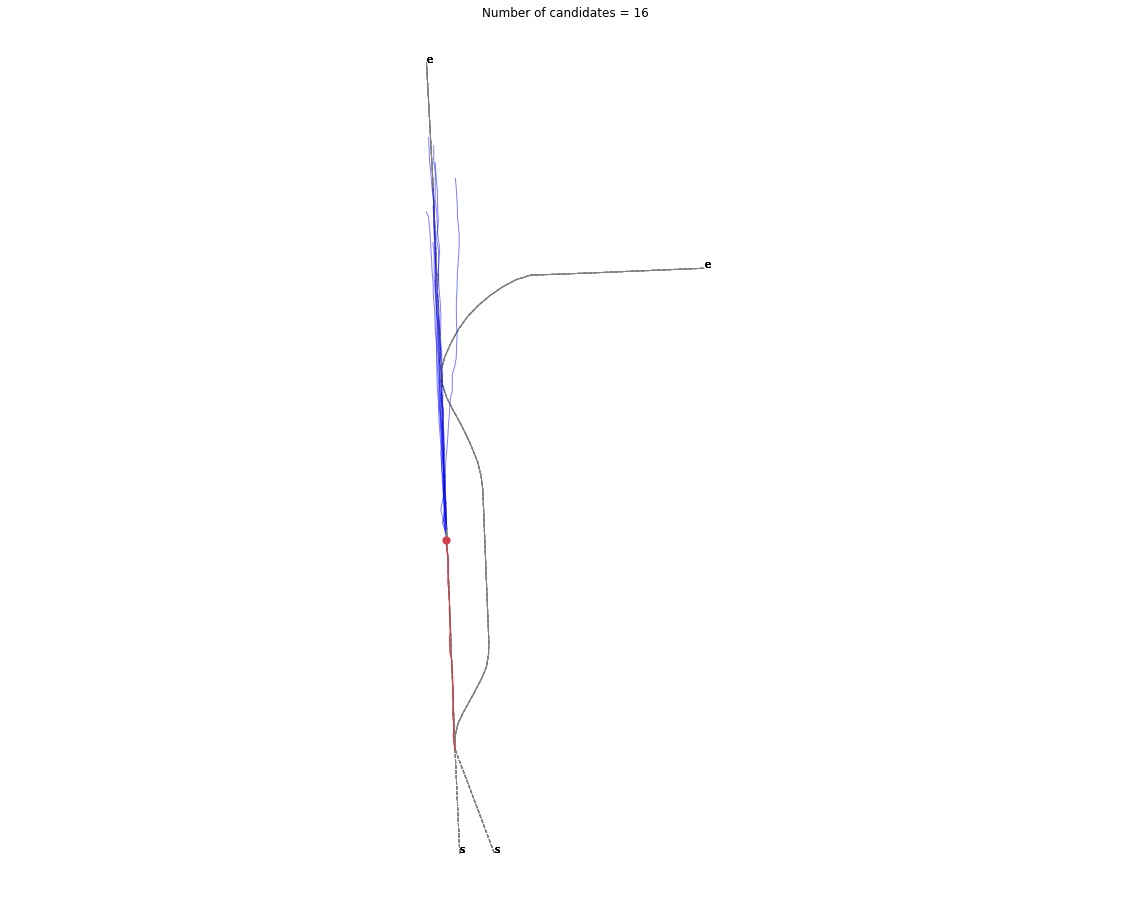

../../data/test_obs/data/49891.csv


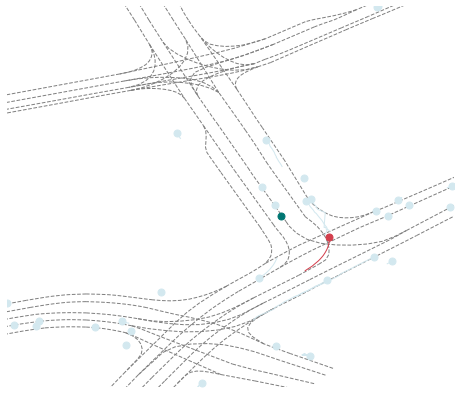

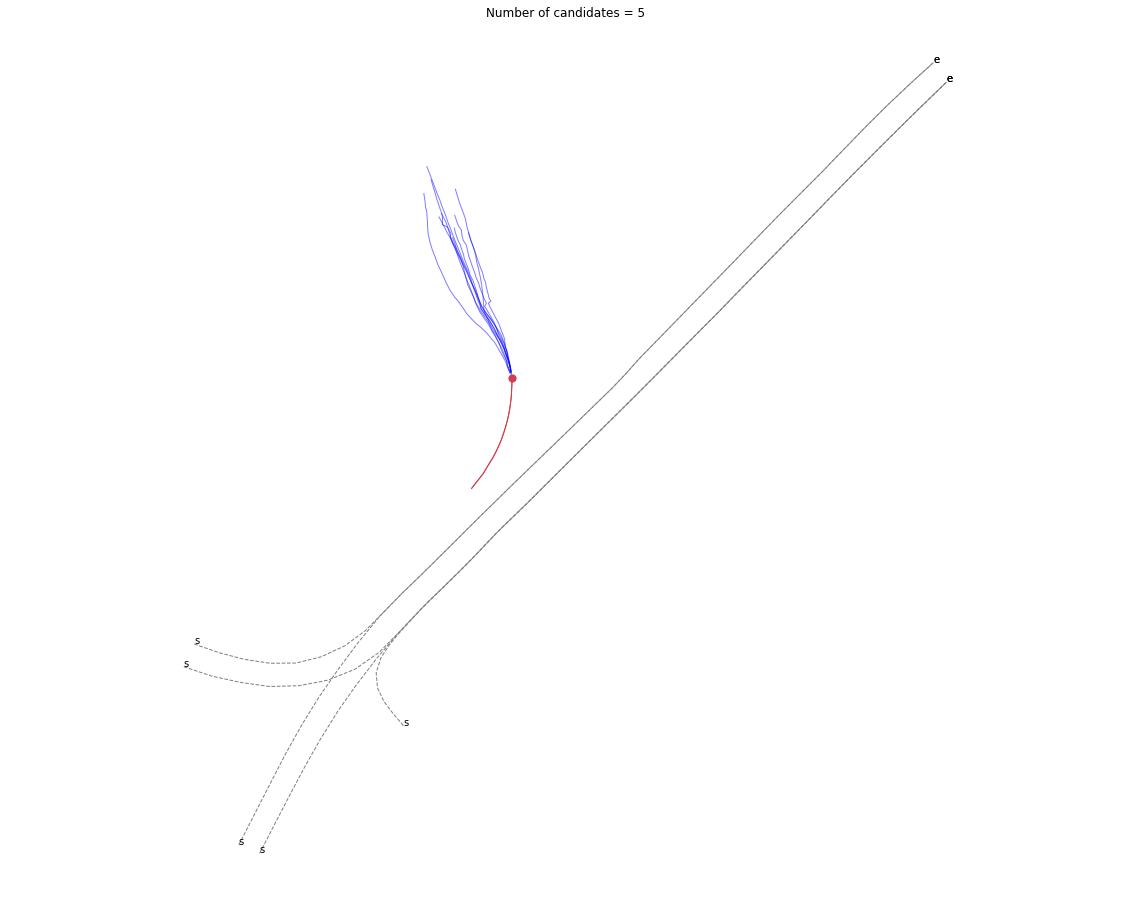

In [10]:
avm = ArgoverseMap()

obs_len = 20
shuffled_nums = np.random.randint(1,78143,20)
for num in shuffled_nums:
    seq_path = f"{root_dir}/{num}.csv"
    print(seq_path)
    viz_sequence(afl.get(seq_path).seq_df, show=True)
    agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
    agent_obs_traj_full = afl.get(seq_path).agent_traj
    xy_pred = data[num][:10]
    candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl.get(seq_path).city, viz=True, 
                                                                  xy_pred=xy_pred, xy_total=agent_obs_traj_full,
                                                                  figsize=(20,16))

In [ ]:
sdimport pickle

In [ ]:
results_pkl = "../../results/const_vel_val.pkl"

In [ ]:
with open(results_pkl, 'rb') as f:
    result = pickle.load(f)

In [ ]:
len(result)

In [ ]:
result[1]

In [ ]:
out_all_pkl = "output_all.pkl"
with open(out_all_pkl, 'rb') as f:
    output_all = pickle.load(f)

In [ ]:
# from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

# ##set root_dir to the correct path to your dataset folder
# root_dir = '../../data/test_obs/data'

# afl = ArgoverseForecastingLoader(root_dir)

# print('Total number of sequences:',len(afl))

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import utils.baseline_utils as baseline_utils

import time as time
start = time.time()
args = type('', (), {})()
baseline_key = "map"
args.test_features="../../features/forecasting_features_test.pkl"
args.train_features="../../features/forecasting_features_train.pkl"
args.val_features="../../features/forecasting_features_val.pkl"
args.use_map=True
args.use_delta=True
args.obs_len = 20
args.pred_len = 20
args.n_neigh = 3

data_dict = baseline_utils.get_data(args, baseline_key)
end = time.time()
print("time: {}".format((end-start)/60))

In [ ]:
test_input = data_dict["test_input"]
test_output = data_dict["test_output"]
test_helpers = data_dict["test_helpers"]

train_input = data_dict["train_input"]
train_output = data_dict["train_output"]
train_helpers = data_dict["train_helpers"]

val_input = data_dict["val_input"]
val_output = data_dict["val_output"]
val_helpers = data_dict["val_helpers"]

# Merge train and val splits and use K-fold cross validation instead
train_val_input = np.concatenate((train_input, val_input))
train_val_output = np.concatenate((train_output, val_output))
train_val_helpers = np.concatenate([train_helpers, val_helpers])

In [ ]:
num_features = len(baseline_utils.BASELINE_INPUT_FEATURES[baseline_key])
num_features

In [ ]:
test_helpers

In [ ]:
train_num_tracks = train_input.shape[0]
train_input = train_input.reshape(
    (train_num_tracks, args.obs_len * num_features), order="F")

# Get test centerline
test_centerlines = test_helpers["CANDIDATE_CENTERLINES"].values
test_nt = test_helpers["CANDIDATE_NT_DISTANCES"].values
test_references = test_helpers["CANDIDATE_DELTA_REFERENCES"].values
test_seq_ids = test_helpers["SEQUENCE"].values

test_num_tracks = test_nt.shape[0]


In [ ]:
args.model_path = "../../model/nn_train_test.pkl"
with open(args.model_path, "rb") as f:
    grid_search = pickle.load(f)
print(f"## Loaded {args.model_path} ....")

In [ ]:
horizon = 30

In [ ]:
idxs = [1,3,5,6]

In [ ]:
test_seq_ids

In [ ]:
test_nt.shape

In [ ]:
test_references[0]

In [ ]:
len(test_centerlines[0])

In [ ]:
len(data.keys())

In [ ]:
data[1]

In [ ]:
len(data[1])

In [ ]:
len(data[1][1])